-> Chargement des librairies et fonctions

In [1]:
# fonctions utilities (affichage, confusion, etc.)
from Fonction.MyNLPUtilities import *
# fonctions utilities (fonction de clean, import etc etc)
from Fonction.myFonction import *

from Fonction.AllModels_traitementfirst import *

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


-> Chargement des données brutes

In [2]:
# Init_train = pd.read_csv('./Data_brut/HAI817_Projet_train.csv', sep=",")
# Init_test = pd.read_csv('./Data_brut/HAI817_Projet_test.csv', sep=",")
# Init_Alle = pd.read_csv('./Data_brut/data_allemand_all.csv', sep=",")
#
#
# data_brute = pd.concat([Init_train,Init_test,Init_Alle], ignore_index = True)
#
# for i in range(0,len(data_brute['our rating'])):
#  if data_brute['our rating'][i] == 'Other':
#      data_brute['our rating'][i] = 'other'
#
# data_brute = data_brute.drop_duplicates()
# print(data_brute['our rating'].value_counts())
#
# data_equilibre = balanceSample(data_brute,210,["false","true","mixture","other"])
# print(data_equilibre['our rating'].value_counts())
# data_equilibre.to_csv('./Data_equilibre/MyData_Sprint2.csv', sep=',', index=False)

mySample = pd.read_csv('./Data_equilibre/MyData_Sprint2.csv', sep=",")
print(mySample['our rating'].value_counts())
X_train = mySample['text']
y_train = mySample['our rating']

false      210
true       210
mixture    210
other      210
Name: our rating, dtype: int64


-> Je test tout les models

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Evaluation de  MultinomialNB
MultinomialNB : 0.487 (0.057) in 1.633 s
Evaluation de  LR
LR : 0.532 (0.053) in 30.842 s
Evaluation de  KNN
KNN : 0.411 (0.046) in 2.545 s
Evaluation de  CART
CART : 0.433 (0.050) in 41.365 s
Evaluation de  RF
RF : 0.498 (0.047) in 41.233 s
Evaluation de  SVM
SVM : 0.543 (0.051) in 986.238 s

Le meilleur resultat : 
Classifier :  SVM  accuracy : 0.543  (0.051)  en 986.238   s

Tous les résultats : 

Classifier :  SVM  accuracy : 0.543  (0.051)  en 986.238   s
Classifier :  LR  accuracy : 0.532  (0.053)  en 30.842   s
Classifier :  RF  accuracy : 0.498  (0.047)  en 41.233   s
Classifier :  MultinomialNB  accuracy : 0.487  (0.057)  en 1.633   s
Classifier :  CART  accuracy : 0.433  (0.050)  en 41.365   s
Classifier :  KNN  accuracy : 0.411  (0.046)  en 2.545   s


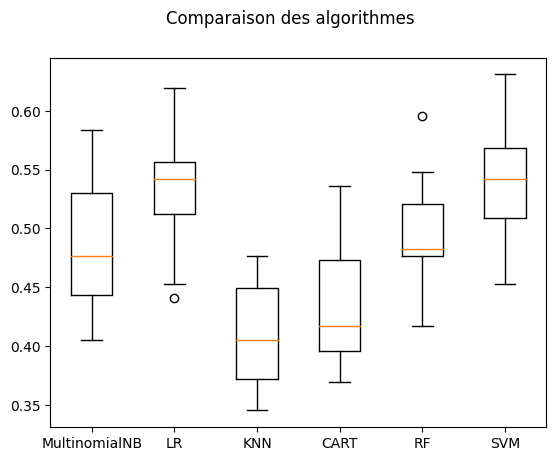

In [3]:
testAllModel(X_train,y_train,5)

-> je test les hyper-parametres de SVC

In [4]:
testSVC(X_train,y_train)

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'svm']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False]}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
réalisé en  110.456 s
Meilleur résultat : 0.527
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: False
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
     cleaner__getlemmatisation  cleaner__removedigit  tfidf__lowercase  \
13                      False                 False              True   
5                        True                 False              True   
1                        True                  True              True   
9                       False                  True              True   
3                        True                  True             False   

   tfidf__stop_words  accuracy  
13

-> Ajuster pretraitement

In [5]:
ajustSVC(X_train, y_train,[False],[False],[None],[True])

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'svm']
parameters :
{'cleaner__removedigit': [False], 'cleaner__getlemmatisation': [False], 'tfidf__stop_words': [None], 'tfidf__lowercase': [True], 'svm__C': [0.001, 0.01, 0.1, 1, 10], 'svm__gamma': [0.001, 0.01, 0.1, 1], 'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
Fitting 5 folds for each of 80 candidates, totalling 400 fits
réalisé en  342.376 s
Meilleur résultat : 0.529
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: False
	svm__C: 1
	svm__gamma: 1
	svm__kernel: 'rbf'
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
     cleaner__getlemmatisation  cleaner__removedigit  svm__C  svm__gamma  \
61                      False                 False     1.0       1.000   
77                      False                 False    10.0       1.000   
73                      False                 False    10.0       0.100   
78                      False 

-> enregistrement du modele SVC

Sauvegarde du modèle dans  ./Modele/Sprint2_new/SentimentModel_Sprint2_new.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('svm', SVC(C=1, gamma=1))])
Accuracy : 0.488
Classification Report
              precision    recall  f1-score   support

       false    0.45833   0.52381   0.48889        21
     mixture    0.41667   0.47619   0.44444        21
       other    0.75000   0.42857   0.54545        21
        true    0.45833   0.52381   0.48889        21

    accuracy                        0.48810        84
   macro avg    0.52083   0.48810   0.49192        84
weighted avg    0.52083   0.48810   0.49192        84



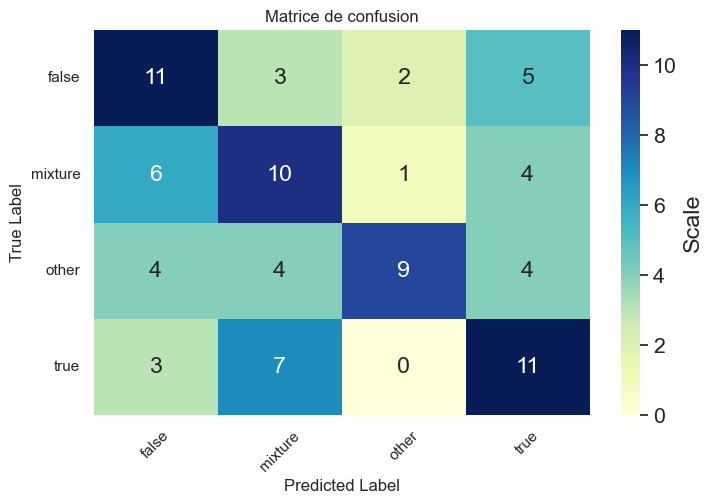

In [8]:
from sklearn.model_selection import train_test_split
import pickle
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30

train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words=None)),
    ('svm', SVC(C=1, gamma=1, kernel='rbf'))
])
pipeline.fit(train_title,train_note)
filename='./Modele/Sprint2_new/SentimentModel_Sprint2_new.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))


print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

-> Second Modèle

In [9]:
testRFC(X_train,y_train)

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'rfc']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False]}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
réalisé en  166.816 s
Meilleur résultat : 0.502
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	tfidf__lowercase: False
	tfidf__stop_words: 'english'

Les premiers résultats : 
     cleaner__getlemmatisation  cleaner__removedigit  tfidf__lowercase  \
10                      False                  True             False   
2                        True                  True             False   
9                       False                  True              True   
13                      False                 False              True   
11                      False                  True             False   

   tfidf__stop_words  accuracy

In [10]:
ajustRFC(X_train, y_train,[True],[False],['english'],[False])

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'rfc']
parameters :
{'cleaner__removedigit': [True], 'cleaner__getlemmatisation': [False], 'tfidf__stop_words': ['english'], 'tfidf__lowercase': [False], 'rfc__n_estimators': [500, 1200], 'rfc__max_depth': [25, 30], 'rfc__min_samples_split': [5, 10, 15], 'rfc__min_samples_leaf': [1, 2]}
Fitting 5 folds for each of 24 candidates, totalling 120 fits
réalisé en  286.920 s
Meilleur résultat : 0.518
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	rfc__max_depth: 30
	rfc__min_samples_leaf: 1
	rfc__min_samples_split: 15
	rfc__n_estimators: 500
	tfidf__lowercase: False
	tfidf__stop_words: 'english'

Les premiers résultats : 
     cleaner__getlemmatisation  cleaner__removedigit  rfc__max_depth  \
16                      False                  True              30   
12                      False                  True              30   
13                      False                  T

Sauvegarde du modèle dans  ./Modele/Sprint2_new/RandomForestClassifier_Sprint2_new.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(removedigit=True)),
                ('tfidf',
                 TfidfVectorizer(lowercase=False, stop_words='english')),
                ('rfc',
                 RandomForestClassifier(max_depth=30, min_samples_split=15,
                                        n_estimators=500))])
Accuracy : 0.452
Classification Report
              precision    recall  f1-score   support

       false    0.52381   0.52381   0.52381        21
     mixture    0.36000   0.42857   0.39130        21
       other    0.52632   0.47619   0.50000        21
        true    0.42105   0.38095   0.40000        21

    accuracy                        0.45238        84
   macro avg    0.45779   0.45238   0.45378        84
weighted avg    0.45779   0.45238   0.45378        84



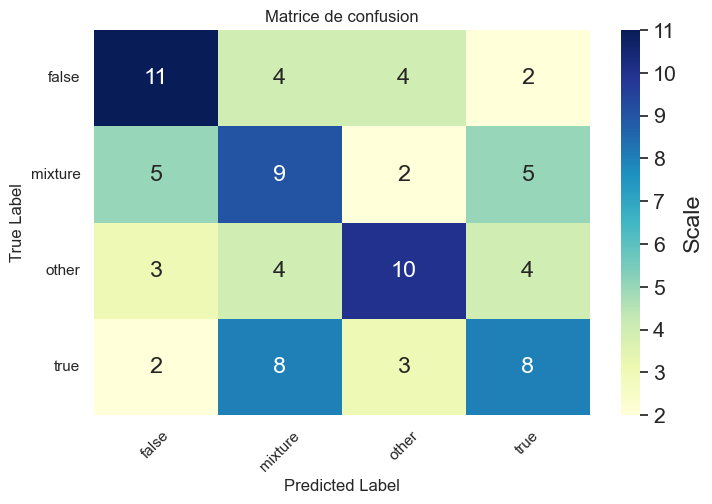

In [11]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)  # stratified = yes

## double classification a regarder
pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=False, stop_words='english')),
    ('rfc', RandomForestClassifier(max_depth=30,min_samples_leaf=1, min_samples_split=15, n_estimators=500))
])
pipeline.fit(train_title,train_note)
filename='./Modele/Sprint2_new/RandomForestClassifier_Sprint2_new.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

Dans ce rapport de classification, la précision représente le taux de prédictions correctes pour chaque classe. Le rappel mesure le taux de vrais positifs prédits pour chaque classe, par rapport au nombre total de vrais positifs réels pour cette classe. Le score F1 est une mesure de la précision et du rappel combinés, qui donne une indication de la performance globale du modèle pour chaque classe.

L'exactitude globale (accuracy) du modèle est de 0,619, ce qui signifie que 61,9% des prédictions du modèle sont correctes.

En ce qui concerne les résultats pour chaque classe, on peut voir que le modèle est relativement bon pour prédire la classe "false" avec une précision de 0,78 et un rappel de 0,67. Il est également assez bon pour prédire la classe "other" avec une précision de 0,76, mais son rappel est un peu plus faible à 0,52.

Le modèle a des performances plus mitigées pour les classes "mixture" et "true", avec une précision de 0,50 pour la classe "mixture" et une précision de 0,48 pour la classe "true". Les rappels pour ces classes sont de 0,75 pour "mixture" et de 0,62 pour "true".

Le rapport de classification pondéré montre une précision pondérée de 0,66 pour toutes les classes combinées, ce qui signifie que le modèle a une performance moyenne globale.

En résumé, le modèle semble relativement bon pour certaines classes mais pourrait être amélioré pour d'autres. Il pourrait être intéressant de voir si des améliorations peuvent être apportées au modèle pour améliorer ses performances pour les classes "mixture" et "true".

-> Le dernier modele

In [12]:
testLR(X_train,y_train)

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'lr']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False]}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
réalisé en  81.843 s
Meilleur résultat : 0.524
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
     cleaner__getlemmatisation  cleaner__removedigit  tfidf__lowercase  \
9                       False                  True              True   
14                      False                 False             False   
15                      False                 False             False   
13                      False                 False              True   
11                      False                  True             False   

   tfidf__stop_words  accuracy  
9    

In [13]:
ajustLR(X_train, y_train,[True],[False],[None],[True])

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'lr']
parameters :
{'cleaner__removedigit': [True], 'cleaner__getlemmatisation': [False], 'tfidf__stop_words': [None], 'tfidf__lowercase': [True], 'lr__solver': ['newton-cg', 'lbfgs', 'liblinear'], 'lr__penalty': ['l2'], 'lr__C': [100, 10, 1.0, 0.1, 0.01]}
Fitting 5 folds for each of 15 candidates, totalling 75 fits
réalisé en  54.370 s
Meilleur résultat : 0.526
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	lr__C: 10
	lr__penalty: 'l2'
	lr__solver: 'newton-cg'
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
    cleaner__getlemmatisation  cleaner__removedigit  lr__C lr__penalty  \
3                      False                  True   10.0          l2   
4                      False                  True   10.0          l2   
6                      False                  True    1.0          l2   
7                      False                  True 

Sauvegarde du modèle dans  ./Modele/Sprint2_new/LogisticRegression_Sprint2_new.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(removedigit=True)),
                ('tfidf', TfidfVectorizer()),
                ('lr', LogisticRegression(C=10, solver='newton-cg'))])
Accuracy : 0.476
Classification Report
              precision    recall  f1-score   support

       false    0.50000   0.52381   0.51163        21
     mixture    0.38095   0.38095   0.38095        21
       other    0.62500   0.47619   0.54054        21
        true    0.44000   0.52381   0.47826        21

    accuracy                        0.47619        84
   macro avg    0.48649   0.47619   0.47785        84
weighted avg    0.48649   0.47619   0.47785        84



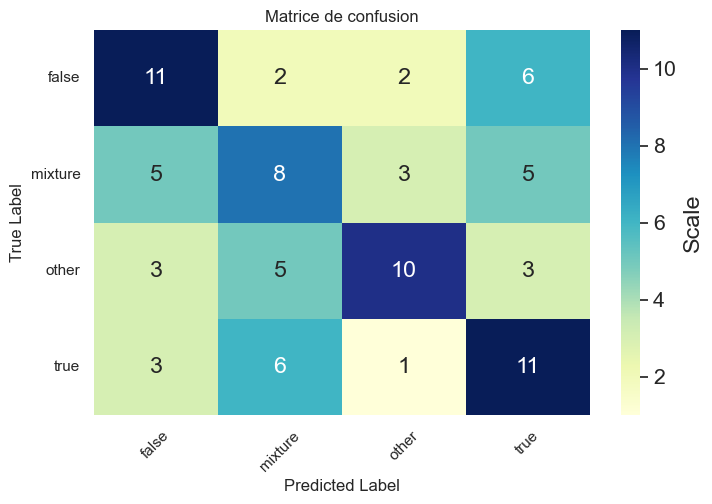

Accuracy: 0.47619047619047616


In [15]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize,stratify=y_train)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words=None)),
    ('lr', LogisticRegression(C=10,penalty='l2', solver='newton-cg'))
])
pipeline.fit(train_title,train_note)
filename='./Modele/Sprint2_new/LogisticRegression_Sprint2_new.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

accuracy = clf_loaded.score(test_title, test_note)
print('Accuracy:', accuracy)

